[0.5 0.5]


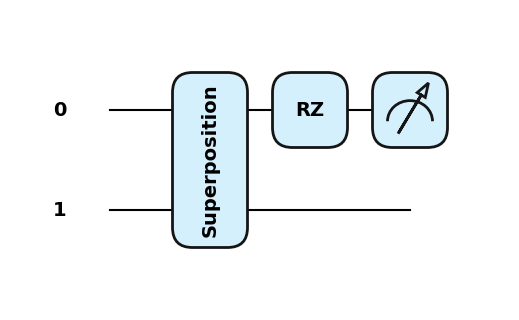

In [206]:
# calculate rotation angle
def rotAngle(p):
    return -1j/2*np.log(p[0]/p[1])

rotAngle(p)

dev = qml.device('default.qubit', wires=2)

base = [[0], [1]]
coeff = [1,1]

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=0, work_wire=1)
    return qml.probs(0)

p = circuit(base, coeff)

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=0, work_wire=1)
    
    # rotation
    qml.RZ(rotAngle(p), wires=0)
    return qml.probs(0)

print(circuit(base, coeff, p))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0], [1]], [1, 3], p)
plt.show()

In [ ]:
# calculate rotation angle
def rotAngle(p):
    return -1j/2*np.log(p[0]/p[1])

rotAngle(p)

dev = qml.device('default.qubit', wires=2)

base = [[0], [1]]
coeff = [1,1]

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=0, work_wire=1)
    return qml.probs(0)

p = circuit(base, coeff)

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=0, work_wire=1)
    
    # rotation
    qml.RZ(rotAngle(p), wires=0)
    return qml.probs(0)

print(circuit(base, coeff, p))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0], [1]], [1, 3], p)
plt.show()

In [183]:
base = [[0,0], [0,1], [1,0], [1,1]]
coeff = [1,2,4,1]

dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    print(np.linalg.norm(coeff))
    qml.Superposition(coeff, base, wires=[0, 1], work_wire=2)

    # rotation
    # qml.RZ(rotAngle(p), wires=0)
    return qml.probs([0,1])

p = circuit(base, coeff)
p

0.9999999999999999


array([0.04545455, 0.18181818, 0.72727273, 0.04545455])

In [164]:
# calculate rotation angle
# def rotAngle_2d(p):
#     # p = np.concatenate([p0, p1])
#     c1 = np.log(p[0])+np.log(p[3])
#     c2 = np.log(p[1])-np.log(p[2])
#     return [(c1+c2)/4j, (c1-c2)/4j]

# rotAngle_2d(p)

def rotAngle_2d(p):
    c1 = (np.log(p[0]) - np.log(p[2])) / 2j
    c2 = (np.log(p[0]) - np.log(p[1])) / 2j
    # c1 = np.arccos(np.square(p[0]/p[2]))
    # c2 = np.arccos(np.square(p[0]/p[1]))
    return [c1, c2]

rotAngle_2d(p)

[1.3862943611198906j, 0.6931471805599452j]

In [195]:
base = [[0,0], [0,1], [1,0], [1,1]]
coeff = [1,1,2,2]

dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0, 1], work_wire=2)
    
    # rotation
    qml.RZ(p[0], wires=0)
    qml.RZ(p[1], wires=1)
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

circuit(base, coeff, rotAngle_2d(p))

(array([1.  , 0.25]), array([1.  , 0.25]), array([0.8 , 0.2 , 0.2 , 0.05]))

In [191]:
a = np.ones(4) * 0.36363636
np.linalg.norm(a)

0.72727272

In [175]:
a = circuit(base, coeff, rotAngle_2d(p))[2]
np.linalg.norm(a)

0.6298622848955828

0.9999999999999999


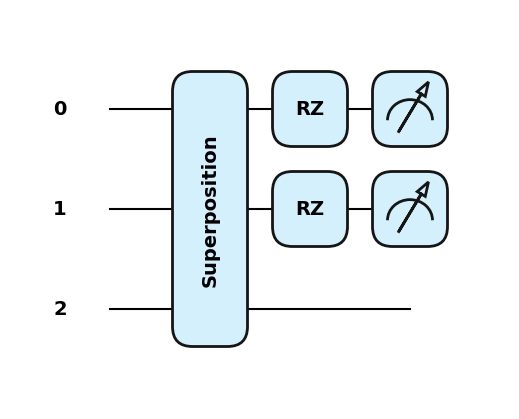

In [143]:
qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(base, coeff, p)
plt.show()

In [182]:
def rotAngle_2d_shift(p):
    c1 = (np.log(p[0]) - np.log(p[2])) / 2j
    c2 = ((np.log(p[0]) - np.log(p[1]))+(np.log(p[2]) - np.log(p[3])))/ 4j
    c3 = ((np.log(p[2]) - np.log(p[3]))+(np.log(p[1]) - np.log(p[0])))/ 4j
    # c1 = np.arccos(np.square(p[0]/p[2]))
    # c2 = np.arccos(np.square(p[0]/p[1]))
    return [c1, c2, c3]

rotAngle_2d_shift(p)

[1.3862943611198906j, -0.3465735902799727j, -1.0397207708399179j]

In [184]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0, 1], work_wire=2)
    
    # rotation
    qml.RZ(p[0], wires=0)
    qml.RZ(p[1], wires=1)

    # phase shift
    qml.PhaseShift(p[2], wires=1)
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

circuit(base, coeff, rotAngle_2d_shift(p))

(array([8.3567165 , 0.25712974]),
 array([0.25712974, 8.3567165 ]),
 array([0.12856487, 8.22815164, 0.12856487, 0.12856487]))

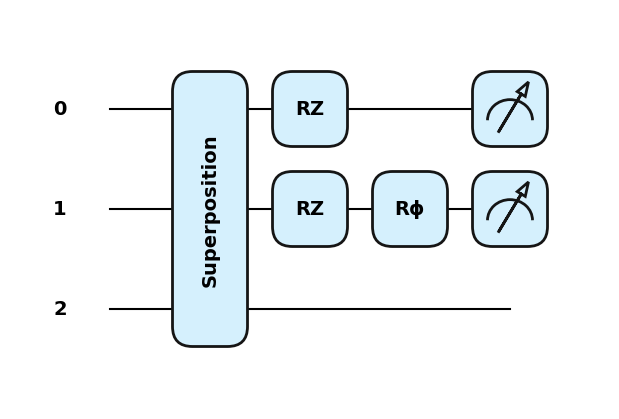

In [185]:
qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(base, coeff, p)
plt.show()